In [ ]:
# подключение библиотек и зависимостей
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from skopt import BayesSearchCV
from sklearn.decomposition import PCA

# Разведочный анализ

## Загрузка датасета

Ссылка на kaggle-соревнование [тут](https://www.kaggle.com/competitions/critical-temperature-of-superconductors/overview)

Датасет (`csv`-файлы) лежит на гугл диске, для удобства импортируем его оттуда

In [ ]:
!gdown 133Ev_X96DFJ-LXJrmMNTmmHL3HwfUV7B
!gdown 1C9tqX6KhxfEJfANTY1kjA9_c4S9gMfkv
!gdown 1OujL6Uy8ZJaFPcPxjwVmS3a3si78xWAP
!gdown 1oC6CIBacDlHA54Yk9wQ1haJ43QYnpZWd

Downloading...
From: https://drive.google.com/uc?id=133Ev_X96DFJ-LXJrmMNTmmHL3HwfUV7B
To: /content/train.csv
100% 19.2M/19.2M [00:00<00:00, 50.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1C9tqX6KhxfEJfANTY1kjA9_c4S9gMfkv
To: /content/test.csv
100% 4.79M/4.79M [00:00<00:00, 25.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OujL6Uy8ZJaFPcPxjwVmS3a3si78xWAP
To: /content/formula_train.csv
100% 5.95M/5.95M [00:00<00:00, 37.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oC6CIBacDlHA54Yk9wQ1haJ43QYnpZWd
To: /content/formula_test.csv
100% 1.47M/1.47M [00:00<00:00, 78.9MB/s]


## Отличия между датасетами

Интересно, чем различаются датасеты с признаками и формулами. Посмотрим на столбцы и первые несколько строк в каждом

In [ ]:
train_df = pd.read_csv('train.csv')
formula_train_df = pd.read_csv('formula_train.csv')

In [ ]:
train_df.head(5)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [ ]:
train_df.columns.values

array(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass',
       'entropy_atomic_mass', 'wtd_entropy_atomic_mass',
       'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass',
       'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie',
       'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie',
       'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius',
       'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius',
       'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density',
       'gmean_Density', 'wtd_gmean_Density', 'entropy_Density',
       'wtd_entropy_Density', 'range_Density', 'wtd_range_Density',
       'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity',
       'wtd_mean_ElectronAffinity', 

Теперь у нас есть представление о содержании признакового датасета:

Структура данных:
- **82 колонки**, где `critical_temp` - целевая переменная (критическая температура)
- `number_of_elements` - количество элементов в соединении

Паттерн названий колонок:
- Для каждого физико-химического свойства вычисляются 10 статистик: `{stat}{property}` и `wtd{stat}_{property}`, где
  - `stat` = mean, gmean, entropy, range, std
  - `wtd` = weighted (взвешенная статистика)
- Физические свойства:
  - `atomic_mass` - атомная масса
  - `fie` - энергия ионизации  
  - `atomic_radius` - атомный радиус
  - `Density` - плотность
  - `ElectronAffinity` - сродство к электрону
  - `FusionHeat` - теплота плавления
  - `ThermalConductivity` - теплопроводность
  - `Valence` - валентность

**Пример:** `mean_atomic_mass` и `wtd_mean_atomic_mass` - средняя и взвешенная средняя атомная масса соответственно.

In [ ]:
formula_train_df.head(5)

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [ ]:
formula_train_df.columns.values

array(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg',
       'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr',
       'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br',
       'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd',
       'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La',
       'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er',
       'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au',
       'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'critical_temp',
       'material'], dtype=object)

Похоже, что этот датасет - аналог первого, но использует исходные формулы вместо агрегированных характеристик

Cтруктура данных:
- **Count Encoding представление** химических формул
- Каждая колонка соответствует химическому элементу (H, He, Li, ..., Rn)
- Значения показывают количество атомов каждого элемента в соединении

Особенности:
- **86 колонок**: 84 химических элемента + `critical_temp` + `material`
- `material` - текстовое представление химической формулы (например, "Ba0.2La1.8Cu1O4")
- `critical_temp` - целевая переменная (критическая температура сверхпроводимости)

**Пример из данных:**
Формула "Ba0.2La1.8Cu1O4" представлена как:
- O: 4.0
- Ba: 0.2  
- La: 1.8
- Cu: 1.0
- Остальные элементы: 0.0

Это альтернативное представление того же датасета со сверхпроводниками, где вместо агрегированных статистик используются исходные химические составы в виде сount encoding


## Объединение в один датасет

Если бы поле `critical_temp` принимало уникальные значения в каждом из датасетов, возможно, мы могли бы сджойнить их по этому полю

In [ ]:
# для train_df
train_temp_duplicates = train_df['critical_temp'].duplicated().sum()
train_total_rows = len(train_df)
train_duplicate_ratio = train_temp_duplicates / train_total_rows

# для formula_train_df
formula_temp_duplicates = formula_train_df['critical_temp'].duplicated().sum()
formula_total_rows = len(formula_train_df)
formula_duplicate_ratio = formula_temp_duplicates / formula_total_rows

print(f"train_df: {train_temp_duplicates} дубликатов critical_temp из {train_total_rows} строк ({train_duplicate_ratio:.1%})")
print(f"formula_train_df: {formula_temp_duplicates} дубликатов critical_temp из {formula_total_rows} строк ({formula_duplicate_ratio:.1%})")

train_df: 14264 дубликатов critical_temp из 17010 строк (83.9%)
formula_train_df: 14264 дубликатов critical_temp из 17010 строк (83.9%)


Хорошо, дубликаты есть, и их много. Но если посмотреть на столбец в обоих датасетах, то видно: записи идут в той же последовательности

In [ ]:
# статистика совпадений
match_count =  (train_df['critical_temp'] == formula_train_df['critical_temp']).sum()
total_count = len(train_df)
match_ratio = match_count / total_count

print(f"Совпадение critical_temp: {match_count} из {total_count} ({match_ratio:.1%})")

Совпадение critical_temp: 17010 из 17010 (100.0%)


Отлично! Мержим, может в будущем пригодится

In [ ]:
# просто объединяем все колонки одного датасета с колонками другого
combined_df = pd.concat([train_df.drop('critical_temp', axis=1), formula_train_df], axis=1)

print(f"Размеры до объединения:")
print(f"train_df: {train_df.shape}")
print(f"formula_train_df: {formula_train_df.shape}")
print(f"После объединения: {combined_df.shape}")

Размеры до объединения:
train_df: (17010, 82)
formula_train_df: (17010, 88)
После объединения: (17010, 169)


In [ ]:
combined_df.columns.values

array(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass',
       'entropy_atomic_mass', 'wtd_entropy_atomic_mass',
       'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass',
       'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie',
       'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie',
       'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius',
       'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius',
       'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density',
       'gmean_Density', 'wtd_gmean_Density', 'entropy_Density',
       'wtd_entropy_Density', 'range_Density', 'wtd_range_Density',
       'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity',
       'wtd_mean_ElectronAffinity', 

## Пропуски и типы данных для датасетов

Посмотрим внимательнее на датасет с агрегированными характеристиками

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               17010 non-null  int64  
 1   mean_atomic_mass                 17010 non-null  float64
 2   wtd_mean_atomic_mass             17010 non-null  float64
 3   gmean_atomic_mass                17010 non-null  float64
 4   wtd_gmean_atomic_mass            17010 non-null  float64
 5   entropy_atomic_mass              17010 non-null  float64
 6   wtd_entropy_atomic_mass          17010 non-null  float64
 7   range_atomic_mass                17010 non-null  float64
 8   wtd_range_atomic_mass            17010 non-null  float64
 9   std_atomic_mass                  17010 non-null  float64
 10  wtd_std_atomic_mass              17010 non-null  float64
 11  mean_fie                         17010 non-null  float64
 12  wtd_mean_fie      

In [ ]:
train_df.isna().sum()

,0
number_of_elements,0
mean_atomic_mass,0
wtd_mean_atomic_mass,0
gmean_atomic_mass,0
wtd_gmean_atomic_mass,0
...,...
range_Valence,0
wtd_range_Valence,0
std_Valence,0
wtd_std_Valence,0


In [ ]:
sum(train_df.isna().sum())

0

Все признаки числовые, а значит, не придется задумываться о кодировании категорий! К тому же в данных нет пропусков

In [ ]:
train_df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,...,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000
mean,4.113874,87.534919,73.000381,71.308789,58.599393,1.165500,1.063972,115.443468,33.228642,44.320187,...,3.151430,3.055206,3.054358,1.295344,1.052631,2.042034,1.482988,0.839731,0.673590,34.502993
std,1.437846,29.786319,33.730910,31.166777,36.902657,0.364607,0.401877,54.614167,27.104426,19.993413,...,1.192035,1.045869,1.175579,0.393231,0.380725,1.244305,0.980906,0.485728,0.454975,34.334793
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.383174,52.078254,58.001648,35.228269,0.966676,0.777721,78.353150,16.790394,32.890369,...,2.117647,2.245649,2.091629,1.060857,0.779166,1.000000,0.920000,0.451754,0.307467,5.330000
50%,4.000000,84.841880,60.547264,66.361592,39.821155,1.199541,1.148646,122.906070,26.585389,45.123500,...,2.605455,2.615321,2.429201,1.368922,1.168512,2.000000,1.062857,0.800000,0.500000,20.000000
75%,5.000000,100.404410,85.982586,78.116681,73.075297,1.444537,1.359836,154.119320,38.193007,58.973428,...,4.019566,3.722419,3.914868,1.589027,1.331531,3.000000,1.912000,1.200000,1.020735,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


Признаки могут иметь разный масштаб, так что можно задуматься о масштабировании данных

Посмотрим внимательнее на датасет с химическим составом

In [ ]:
formula_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17010 entries, 0 to 17009
Data columns (total 88 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   H              17010 non-null  float64
 1   He             17010 non-null  int64  
 2   Li             17010 non-null  float64
 3   Be             17010 non-null  float64
 4   B              17010 non-null  float64
 5   C              17010 non-null  float64
 6   N              17010 non-null  float64
 7   O              17010 non-null  float64
 8   F              17010 non-null  float64
 9   Ne             17010 non-null  int64  
 10  Na             17010 non-null  float64
 11  Mg             17010 non-null  float64
 12  Al             17010 non-null  float64
 13  Si             17010 non-null  float64
 14  P              17010 non-null  float64
 15  S              17010 non-null  float64
 16  Cl             17010 non-null  float64
 17  Ar             17010 non-null  int64  
 18  K     

In [ ]:
formula_train_df.isna().sum()

,0
H,0
He,0
Li,0
Be,0
B,0
...,...
Po,0
At,0
Rn,0
critical_temp,0


In [ ]:
sum(formula_train_df.isna().sum())

0

Здесь тоже признаки числовые и в данных нет пропусков

In [ ]:
formula_train_df[formula_train_df['B'] != 0.0]['B']

,B
2228,0.5
2229,0.5
2230,0.5
2231,0.5
2567,2.6
...,...
16801,12.0
16812,6.0
16813,2.0
16814,6.0


In [ ]:
formula_train_df.describe()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,17010.000000,17010.0,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.0,...,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.000000,17010.0,17010.0,17010.0,17010.000000
mean,0.018447,0.0,0.011884,0.035189,0.141945,0.376868,0.012462,3.010023,0.015318,0.0,...,0.035000,0.023379,0.036708,0.049646,0.042367,0.200175,0.0,0.0,0.0,34.502993
std,0.287419,0.0,0.125699,0.861767,1.107689,4.357716,0.123290,3.796711,0.136147,0.0,...,0.310635,0.800146,0.205809,0.279357,0.286488,0.656456,0.0,0.0,0.0,34.334793
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000210
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.330000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,20.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,6.800000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,63.000000
max,14.000000,0.0,2.600000,40.000000,105.000000,120.000000,5.000000,66.000000,4.000000,0.0,...,5.000000,64.000000,8.000000,7.000000,19.000000,14.000000,0.0,0.0,0.0,185.000000


Признаки могут иметь разный масштаб, так что можно задуматься о масштабировании данных

## Информация о целевой переменной

Посмотрим на распределение целевой переменной, вдруг обнаружим что-то интересное

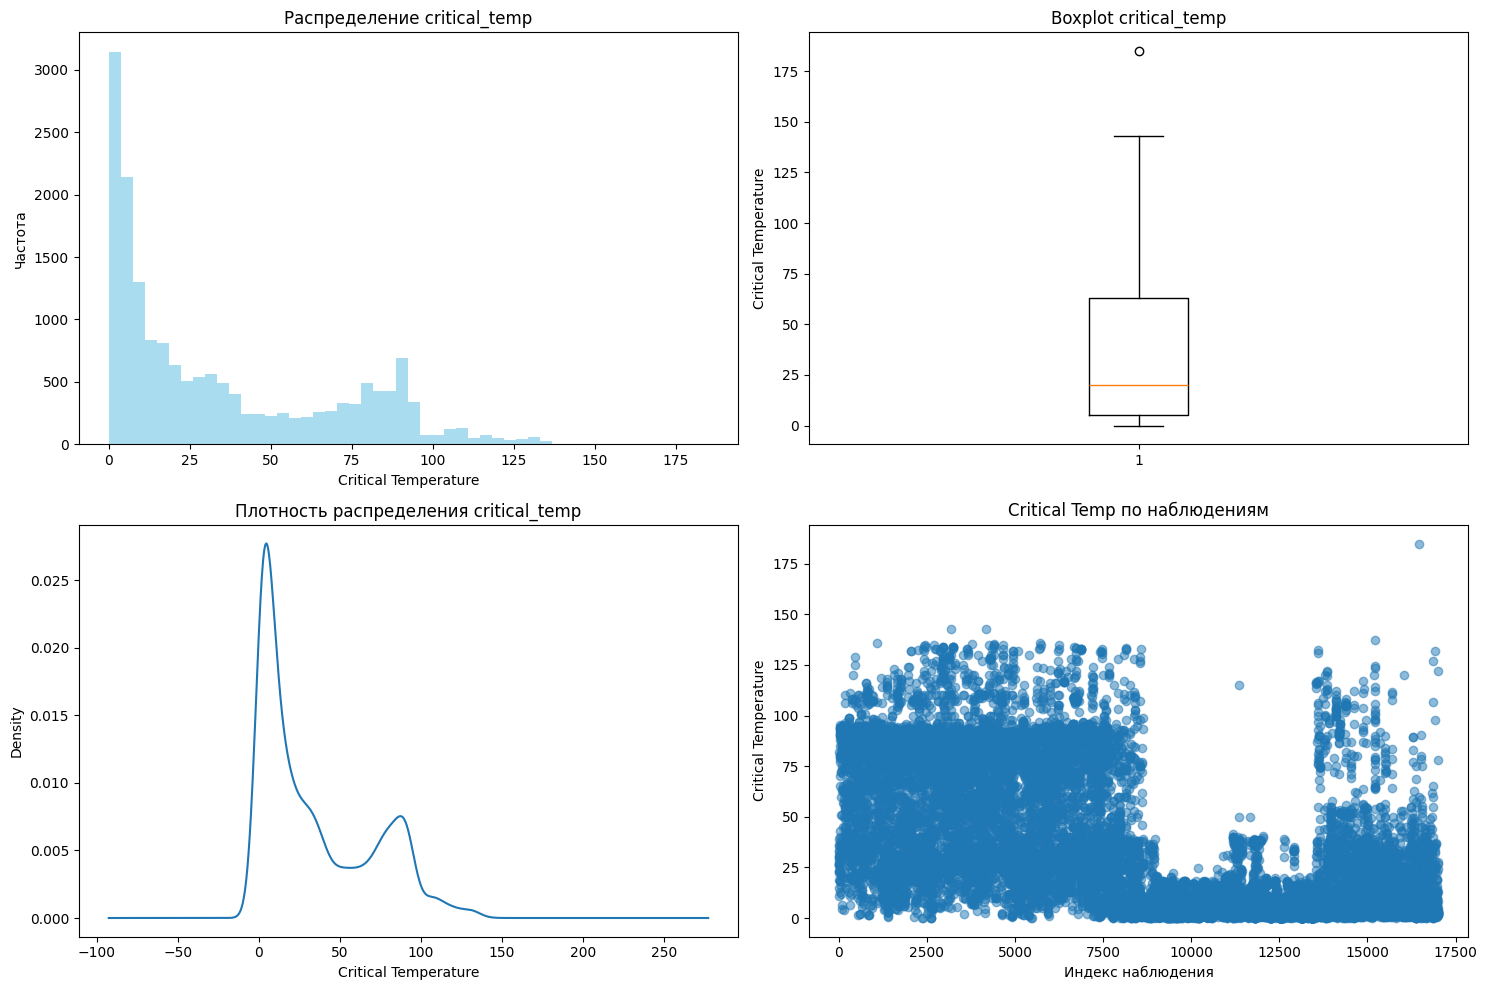

Базовая статистика critical_temp:
count    17010.000000
mean        34.502993
std         34.334793
min          0.000210
25%          5.330000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64


In [ ]:
# графики для целевой переменной
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# гистограмма
axes[0,0].hist(train_df['critical_temp'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Распределение critical_temp')
axes[0,0].set_xlabel('Critical Temperature')
axes[0,0].set_ylabel('Частота')

# boxplot
axes[0,1].boxplot(train_df['critical_temp'])
axes[0,1].set_title('Boxplot critical_temp')
axes[0,1].set_ylabel('Critical Temperature')

# плотность распределения
train_df['critical_temp'].plot.kde(ax=axes[1,0])
axes[1,0].set_title('Плотность распределения critical_temp')
axes[1,0].set_xlabel('Critical Temperature')

# точечный график (по индексу)
axes[1,1].scatter(range(len(train_df)), train_df['critical_temp'], alpha=0.5)
axes[1,1].set_title('Critical Temp по наблюдениям')
axes[1,1].set_xlabel('Индекс наблюдения')
axes[1,1].set_ylabel('Critical Temperature')

plt.tight_layout()
plt.show()

# базовая статистика
print("Базовая статистика critical_temp:")
print(train_df['critical_temp'].describe())

Кажется, в данных имеется выброс (и всего один). Посмотрим на него

In [ ]:
outliers = train_df[train_df['critical_temp'] > 175]
print(outliers[['critical_temp']])

       critical_temp
16461          185.0


In [ ]:
train_df.iloc[16461, :]

,16461
number_of_elements,2.000000
mean_atomic_mass,16.536470
wtd_mean_atomic_mass,11.360293
gmean_atomic_mass,5.685033
wtd_gmean_atomic_mass,3.193745
...,...
range_Valence,5.000000
wtd_range_Valence,1.333333
std_Valence,2.500000
wtd_std_Valence,2.357023


In [ ]:
formula_train_df.iloc[16461, :]

,16461
H,2.0
He,0
Li,0.0
Be,0.0
B,0.0
...,...
Po,0
At,0
Rn,0
critical_temp,185.0


Судя по формуле, этим объектом оказался обычный [сероводород](https://ru.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%BE%D0%B2%D0%BE%D0%B4%D0%BE%D1%80%D0%BE%D0%B44)!

> Заявление, что критическая температура сверхпроводимости сероводорода ниже -175 градусов, не соответствует последним научным данным. Реальная критическая температура для сероводорода в сверхпроводящем состоянии при высоких давлениях гораздо выше, достигая около -70 градусов и более, вплоть до положительных температур под экстремальным давлением.

Таким образом, это некорректное значение. А поскольку MSE неустойчива к выбросам, данный пример может испортить модель, попади он в обучающую выборку. Возможно, имеет смысл его удалить

## Корреляции

Поскольку мы используем линейную модель, разумно заранее проверить меру линейной связи для всех трех датасетов

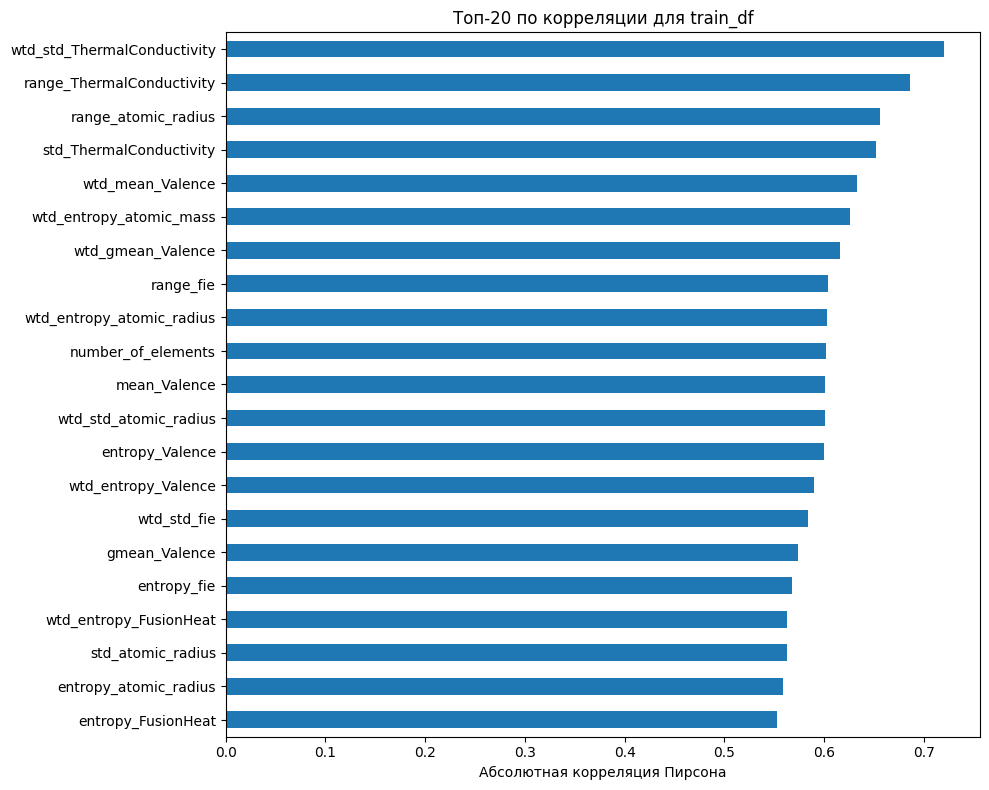

In [ ]:
# берем топ-20 по абсолютной корреляции для train_df
top_n = 20
target_correlations = train_df.corr()['critical_temp'].abs().sort_values(ascending=False)

# Исключаем саму целевую переменную
top_features = target_correlations.drop('critical_temp')[0:top_n+1]  # пропускаем critical_temp

plt.figure(figsize=(10, 8))
top_features.sort_values().plot(kind='barh')
plt.title(f'Топ-{top_n} по корреляции для train_df')
plt.xlabel('Абсолютная корреляция Пирсона')
plt.tight_layout()
plt.show()

Есть довольно много коррелирующих признаков

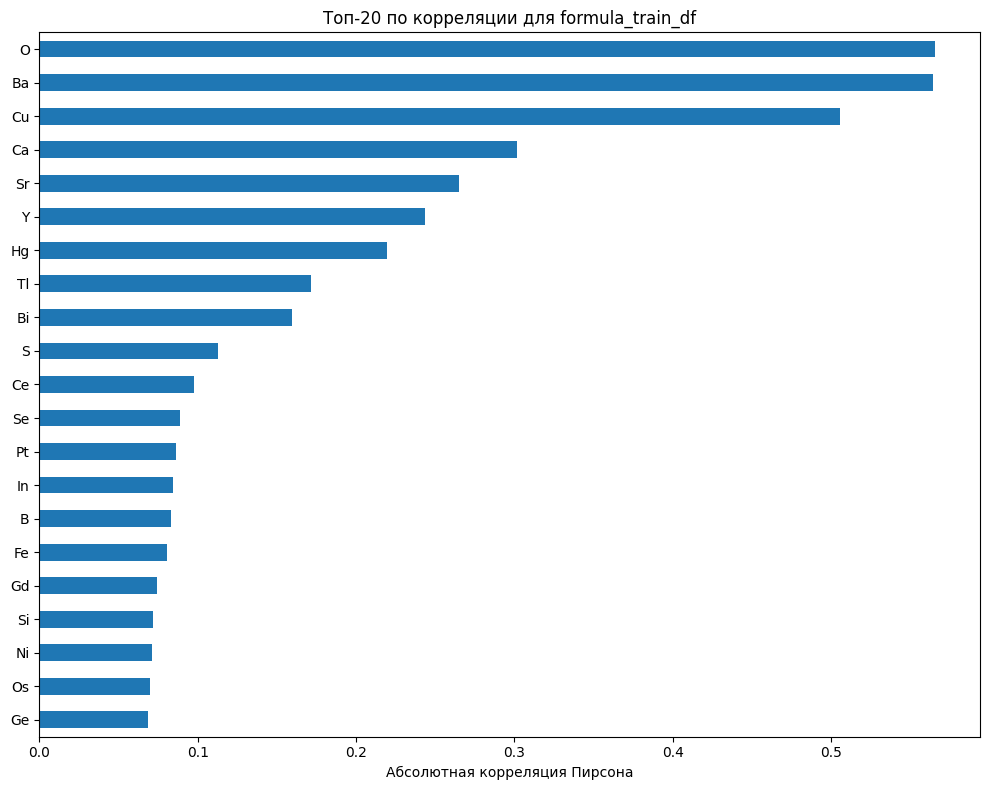

In [ ]:
# берем топ-20 по абсолютной корреляции для formula_train_df
top_n = 20
target_correlations = formula_train_df.drop('material', axis=1).corr()['critical_temp'].abs().sort_values(ascending=False)

# Исключаем саму целевую переменную
top_features = target_correlations.drop('critical_temp')[0:top_n+1]  # пропускаем critical_temp

plt.figure(figsize=(10, 8))
top_features.sort_values().plot(kind='barh')
plt.title(f'Топ-{top_n} по корреляции для formula_train_df')
plt.xlabel('Абсолютная корреляция Пирсона')
plt.tight_layout()
plt.show()

Видно, что наличие в составе некоторых соединений связано коррелирует с целевой переменной

# Проверка гипотез об обучении


Ниже будем формулировать простые гипотезы, обучать модели и делать выводы. В качестве моделей, на которых будем замерять изменения, используем реализации линейной регрессии из библиотеки `scikit-learn`

Гипотезы, по сути, делятся на 2 типа:
- связанные с данными (пример: использовать датасет с формулами или характеристикамми)
- связанные с моделью (пример: какой learning-rate поставить)

Замеряться будем с помощью кросс-валидации под метрику `MSE`. Обучать модели линейной регрессии недорого с точки зрения врмени и ресурсов, поэтому более точная оценка не повредит. После проверки гипотез обучем лучшуюю модель на всех данных

В качестве baseline-модели используем константу. Как известно, для MSE-функционала оптимальной константой является простое среднее целевой переменной. Если наша модель не сможет обойти константу, значит, мы делаем что-то не то)

**Важное замечание:** линейную регрессию можно решать как аналитичеки (при помощи разных солверов), так и используя градиентный спуск. Наверное, все эти решения сходятся примерно к одному и тому же, но проверка требуется

---
[ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression) на реализацию аналитического варианта лин-рега в `scikit-learn`

[ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor) на реализацию градиентного варианта лин-рега в `scikit-learn`

Сначала проверим гипотезы о данных, потом общие гипотезы о моделях, потом сделаем перебор гиперпараметров для нахождения лучшего решения

In [ ]:
def evaluate_model(model, X, y, model_name=""):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse_mean = -cv_scores.mean()  # преобразуем обратно в положительное MSE
    mse_std = cv_scores.std()
    print(f"{model_name:20} | MSE: {mse_mean:.4f} ± {mse_std:.4f}")
    return mse_mean, mse_std

## Агрегации против формул

In [ ]:
# обучим модель "из коробки" на train_df, formula_train_df и combined_df
X_train = train_df.drop('critical_temp', axis=1)
X_formula = formula_train_df.drop(['critical_temp', 'material'], axis=1)
X_combined = combined_df.drop(['critical_temp', 'material'], axis=1)
y = combined_df['critical_temp']

In [ ]:
# оценка для train_df (статистические фичи)
lr1 = LinearRegression()
evaluate_model(lr1, X_train, y, "train_df")

# оценка для formula_train_df (химический состав)
lr2 = LinearRegression()
evaluate_model(lr2, X_formula, y, "formula_train_df")

# оценка для combined_df (все фичи)
lr3 = LinearRegression()
evaluate_model(lr3, X_combined, y, "combined_df")

train_df             | MSE: 358.7778 ± 141.8689
formula_train_df     | MSE: 787.4798 ± 127.0650
combined_df          | MSE: 856.2444 ± 498.4430


(np.float64(856.2443619183592), np.float64(498.4430313707273))

Сырой химический состав плохо линейно связан с целевой переменной. Статистические фичи уже содержат полезные закономерности, они в $2.2$x лучше химического состава. Комбинированные фичи показывают худший результат - возможна мультиколлинеарность. Например, из `train_df`: *mean_atomic_mass = 88.94*; из `formula_train_df`: *Ba=0.2, La=1.8, Cu=1.0, O=4.0* (из которых вычисляется mean_atomic_mass)

Не исключено, что конкретный состав был бы подарком для решающий деревьев или других нелинейный моделей, однако в нашем случае он бесполезен (разве что сгенерировать на основе него новые признаки)

**Решение:** оставляем только `train_df`

## Масштабирование признаков

In [ ]:
X = train_df.drop('critical_temp', axis=1)
y = train_df['critical_temp']

# без скалирования
lr_raw = LinearRegression()
evaluate_model(lr_raw, X, y, "No Scaling")

# со StandardScaler (стандартизация)
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)
lr_std = LinearRegression()
evaluate_model(lr_std, X_std, y, "StandardScaler")

# с MinMaxScaler (нормализация)
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
lr_minmax = LinearRegression()
evaluate_model(lr_minmax, X_minmax, y, "MinMaxScaler")

# с RobustScaler (устойчивая стандартизация)
scaler_robust = RobustScaler()
X_robust = scaler_robust.fit_transform(X)
lr_robust = LinearRegression()
evaluate_model(lr_robust, X_robust, y, "RobustScaler")

No Scaling           | MSE: 358.7778 ± 141.8689
StandardScaler       | MSE: 358.7778 ± 141.8689
MinMaxScaler         | MSE: 358.7778 ± 141.8689
RobustScaler         | MSE: 358.7778 ± 141.8689


(np.float64(358.77777855746143), np.float64(141.86886995022107))

Для LinearRegression скалирование признаков не повлияло на качество модели - `MSE` остался идентичным. Это ожидаемое поведение, поскольку:
- LinearRegression основана на методе наименьших квадратов, который инвариантен к масштабированию признаков
- Скалирование меняет масштаб коэффициентов, но не меняет предсказательную способность модели
- Оптимальная гиперплоскость остается той же, меняется только представление в пространстве признаков

Разницу в качестве можно наблюдать только для моделей с регуляризацией (Ridge, Lasso) или методов, чувствительных к масштабу данных (градиентный спуск, методы на расстояниях). Посмотрим на примере Ridge-регуляризатора (скорее всего, мы будем использовать регуляризацию дальше)

In [ ]:
X = train_df.drop('critical_temp', axis=1)
y = train_df['critical_temp']

# без скалирования
ridge_raw = Ridge(alpha=1.0)
evaluate_model(ridge_raw, X, y, "Ridge No Scaling")

# со StandardScaler (стандартизация)
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)
ridge_std = Ridge(alpha=1.0)
evaluate_model(ridge_std, X_std, y, "Ridge + StandardScaler")

# с MinMaxScaler (нормализация)
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
ridge_minmax = Ridge(alpha=1.0)
evaluate_model(ridge_minmax, X_minmax, y, "Ridge + MinMaxScaler")

# с RobustScaler (устойчивая стандартизация)
scaler_robust = RobustScaler()
X_robust = scaler_robust.fit_transform(X)
ridge_robust = Ridge(alpha=1.0)
evaluate_model(ridge_robust, X_robust, y, "Ridge + RobustScaler")

Ridge No Scaling     | MSE: 358.3595 ± 143.5237
Ridge + StandardScaler | MSE: 358.1209 ± 144.0751
Ridge + MinMaxScaler | MSE: 362.8963 ± 159.3875
Ridge + RobustScaler | MSE: 358.2057 ± 144.8152


(np.float64(358.2057359804231), np.float64(144.81522883048135))

Видим, что для адекватных значений `alpha` разницы почти нет, чуть лучше других себя показал `StandardScaler`

**Решение:** берем `StandardScaler`

## Удаление выброса

In [ ]:
# замерим качество на данных с выбросом и без него

X = train_df.drop('critical_temp', axis=1)
y = train_df['critical_temp']
outlier_index = 16461

X_clean = X.drop(outlier_index)
y_clean = y.drop(outlier_index)

# на данных с выбросом
lr_outlier = LinearRegression()
evaluate_model(lr_outlier, X, y, "С выбросом")

# на данных без выброса
lr_clean = LinearRegression()
evaluate_model(lr_clean, X_clean, y_clean, "Без выброса")

С выбросом           | MSE: 358.7778 ± 141.8689
Без выброса          | MSE: 355.7794 ± 144.1233


(np.float64(355.7793951787347), np.float64(144.12334156613355))

Пусть выброс всего один, но при его исключениии качество заметно растет (по сравнению с другими гипотезами)!

**Решение:** избавляемся от выброса

## Baseline

Мы примерно поняли, в каком виде ходим отдавать данные модели. Теперь переберем различные реализации и их настройки. Сделаем две модели: одна будет использовать аналитический подход и соотвествтующие солверы, вторая градиентный спуск и оптимизаторы. Однако для начала сделаем baseline-модель (константа | среднее) и подготовленный набор данных

In [ ]:
# агрегированные статистики с мастшабированием
outlier_index = 16461
X = train_df.drop('critical_temp', axis=1).drop(outlier_index)
y = train_df['critical_temp'].drop(outlier_index)

scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)

X_std_df = pd.DataFrame(X_std, columns=X.columns, index=X.index)

prepared_train_df = pd.concat([X_std_df, y], axis=1)
X_prepared = prepared_train_df.drop('critical_temp', axis=1)
y_prepared = prepared_train_df['critical_temp']

prepared_train_df.head(3)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-0.079289,0.047190,-0.448929,-0.158878,-0.609374,0.044538,-0.004046,0.136561,-0.052948,0.382497,...,-0.750246,-0.804963,-0.710011,0.187008,0.035622,-0.837442,-0.405017,-0.837424,-0.519869,29.0
1,0.616240,0.174274,-0.429488,0.058408,-0.601786,0.778415,-0.015594,0.136561,0.108174,0.138692,...,-0.750246,-1.115894,-0.717756,0.665654,-0.014284,-0.033647,-0.361325,-0.426677,-0.450502,26.0
2,-0.079289,0.047190,-0.448261,-0.158878,-0.609214,0.044538,-0.219102,0.136561,0.092647,0.382497,...,-0.738262,-0.804963,-0.699042,0.187008,-0.061688,-0.837442,-0.375889,-0.837424,-0.503075,19.0


In [ ]:
# Baseline модель - предсказывает среднее значение
baseline = DummyRegressor(strategy='mean')
evaluate_model(baseline, X_prepared, y_prepared, "Baseline (mean)")

Baseline (mean)      | MSE: 1454.1753 ± 496.4036


(np.float64(1454.1753386110577), np.float64(496.4035916023163))

## Аналитическое решение

### Регуляризация

In [ ]:
# используем различные типы регуляризаторов и замерим качество

# без регуляризации (OLS)
lr = LinearRegression()
evaluate_model(lr, X_prepared, y_prepared, "LinearRegression (OLS)")

# L2 регуляризация (Ridge) с разными alpha
ridge_alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    evaluate_model(ridge, X_prepared, y_prepared, f"Ridge (alpha={alpha})")

# L1 регуляризация (Lasso) с разными alpha
lasso_alphas = [0.001, 0.01, 0.1, 1.0, 10.0]
for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000, tol=0.001)
    mse_lasso = evaluate_model(lasso, X_prepared, y_prepared, f"Lasso (alpha={alpha})")

# ElasticNet (смешанная регуляризация)
elastic_params = [
    (0.01, 0.3), (0.01, 0.5), (0.01, 0.7),
    (0.1, 0.3), (0.1, 0.5), (0.1, 0.7)
]
for alpha, l1_ratio in elastic_params:
    elastic = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000, tol=0.001)
    evaluate_model(elastic, X_prepared, y_prepared, f"ElasticNet (α={alpha}, l1={l1_ratio})")

LinearRegression (OLS) | MSE: 355.7794 ± 144.1233
Ridge (alpha=0.001)  | MSE: 355.7769 ± 144.1279
Ridge (alpha=0.01)   | MSE: 355.7546 ± 144.1688
Ridge (alpha=0.1)    | MSE: 355.5764 ± 144.5264
Ridge (alpha=1.0)    | MSE: 355.0785 ± 146.3662
Ridge (alpha=10.0)   | MSE: 354.7069 ± 153.1551


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.192e+05, tolerance: 1.353e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.682e+05, tolerance: 1.409e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.939e+05, tolerance: 1.651e

Lasso (alpha=0.001)  | MSE: 355.6426 ± 145.5421
Lasso (alpha=0.01)   | MSE: 356.0337 ± 154.3856
Lasso (alpha=0.1)    | MSE: 379.9894 ± 174.6325
Lasso (alpha=1.0)    | MSE: 444.2701 ± 232.8208
Lasso (alpha=10.0)   | MSE: 742.9225 ± 360.6413
ElasticNet (α=0.01, l1=0.3) | MSE: 366.2548 ± 167.5766
ElasticNet (α=0.01, l1=0.5) | MSE: 364.1302 ± 165.5533
ElasticNet (α=0.01, l1=0.7) | MSE: 361.3205 ± 163.0829
ElasticNet (α=0.1, l1=0.3) | MSE: 392.3178 ± 196.5842
ElasticNet (α=0.1, l1=0.5) | MSE: 388.7154 ± 193.6911
ElasticNet (α=0.1, l1=0.7) | MSE: 385.8522 ± 188.9432


Эксперименты показали, что **Ridge-регуляризация** демонстрирует наилучшие результаты (`MSE` = $357.6$ при `α`=$10.0$), незначительно превосходя обычную линейную регрессию (`MSE` = $358.8$). Lasso и ElasticNet оказались неэффективны - модели не сходятся даже при $10000$ итерациях, а их качество существенно хуже. Это свидетельствует о наличии мультиколлинеарности в данных, с которой L2-регуляризация справляется лучше L1. Оптимальным выбором является Ridge с умеренным коэффициентом регуляризации

**Решение:** берем `L2`-регуляризатор

### Выбор солвера

In [ ]:
# замерим качество на разных солверах

solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

for solver in solvers:
    try:
        ridge = Ridge(alpha=10.0, solver=solver, random_state=42, max_iter=5000)
        evaluate_model(ridge, X_prepared, y_prepared, f"Ridge ({solver})")
    except Exception as e:
        print(f"{solver:25} | ОШИБКА: {e}")

Ridge (auto)         | MSE: 354.7069 ± 153.1551
Ridge (svd)          | MSE: 354.7069 ± 153.1551
Ridge (cholesky)     | MSE: 354.7069 ± 153.1551
Ridge (lsqr)         | MSE: 355.3102 ± 152.8565
Ridge (sparse_cg)    | MSE: 354.7929 ± 153.1554
Ridge (sag)          | MSE: 354.7222 ± 153.1483
Ridge (saga)         | MSE: 354.7404 ± 153.1413


In [ ]:
ridge_lbfgs = Ridge(alpha=1.0, solver='lbfgs', positive=True)
evaluate_model(ridge_lbfgs, X_prepared, y_prepared, f"Ridge (lbfgs)")

Ridge (lbfgs)        | MSE: 539.9860 ± 212.5650


(np.float64(539.9860132300754), np.float64(212.56496480596763))

Эксперимент показал, что большинство солверов демонстрируют практически идентичное качество (`MSE` ≈ $354.7$). Аналитические методы (svd, cholesky) и итеративные (sag, saga) показывают схожие результаты. Исключением стал solver lbfgs, который показал значительно худший результат (`MSE` = $540.0$) из-за ограничения positive=True, искусственно требующего неотрицательных коэффициентов

**Решение:** берем `auto`-solver

### Точная настройка

Мы получили модель, демонстрирующую хорошее качество, используя `L2`-регуляризацию и `auto`-solver. Не стоит забывать, что в реализации есть и другие, более тонкие аспекты. К их числу относятся:

- **alpha** - коэффициент регуляризации L2. Контролирует силу штрафа за большие веса:
  - `alpha → 0` - модель обычной линейной регрессии (риск переобучения)
  - `alpha → ∞` - все веса стремятся к нулю (сильное недообучение)

- **max_iter** - максимальное число итераций для итеративных солверов:
  - `None` - используется значение по умолчанию для каждого солвера
  - Для 'sag' - 1000 итераций, для 'lbfgs' - 15000
  - Для аналитических солверов (svd, cholesky) параметр игнорируется

- **tol** - точность решения (критерий останова):
  - Определяет, когда алгоритм считается сошедшимся
  - Меньшие значения → более точное решение, но дольше вычислений

Определим оптимальные параметры с помощью **Bayesian Optimization**. Это метод настройки гиперпараметров, который строит вероятностную модель целевой функции и последовательно выбирает наиболее перспективные точки для проверки

In [ ]:
# байесовсий поиск гиперпараметров

param_space = {
    'alpha': (1e-3, 1e3, 'log-uniform'),  # (нижняя, верхняя, тип распределения)
    'tol': (1e-6, 1e-1, 'log-uniform')
}

bayes_search = BayesSearchCV(
    Ridge(solver='auto'),
    param_space,
    n_iter=30,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

bayes_search.fit(X_prepared, y_prepared)

print("Лучшие параметры:", bayes_search.best_params_)
print("Лучшее MSE:", -bayes_search.best_score_)

Лучшие параметры: OrderedDict({'alpha': 6.7057451259005125, 'tol': 0.1})
Лучшее MSE: 354.5805448003245


In [ ]:
best_analytical = bayes_search.best_estimator_
evaluate_model(best_analytical, X_prepared, y_prepared, f"Best analytical model")

Best analytical model | MSE: 354.5805 ± 151.3598


(np.float64(354.5805448003245), np.float64(151.35982829184843))

Кажется, мы разобрались с аналитическим решением и нашли оптимальную модель!

## Градиентное решение

### Функция потерь

In [ ]:
# используем различные функции потерь и замерим качество
loss_functions = ['squared_error', 'huber']

for loss in loss_functions:
    sgd = SGDRegressor(loss=loss, max_iter=5000, random_state=42)
    evaluate_model(sgd, X_prepared, y_prepared, f"SGD ({loss})")

SGD (squared_error)  | MSE: 357.6691 ± 153.0897
SGD (huber)          | MSE: 583.4002 ± 388.0379


In [ ]:
epsilon_values = [0.01, 0.1, 0.5, 1.0, 2.0, 3.0]
for epsilon in epsilon_values:
    sgd_huber = SGDRegressor(loss='huber', epsilon=epsilon, max_iter=5000, random_state=42)
    evaluate_model(sgd_huber, X_prepared, y_prepared, f"SGD (huber, ε={epsilon})")

SGD (huber, ε=0.01)  | MSE: 2476.5581 ± 1846.0641
SGD (huber, ε=0.1)   | MSE: 583.4002 ± 388.0379
SGD (huber, ε=0.5)   | MSE: 407.4999 ± 208.5916
SGD (huber, ε=1.0)   | MSE: 395.8447 ± 201.1262
SGD (huber, ε=2.0)   | MSE: 385.3101 ± 190.3969
SGD (huber, ε=3.0)   | MSE: 384.5598 ± 187.8530


Для `SGDRegressor` оптимальной оказалась функция потерь `squared_error`, которая значительно превосходит `huber` при оценке по метрике MSE. Это ожидаемый результат, поскольку модель с `squared_error` непосредственно минимизирует целевую метрику оценки

**Решение:** будем использовать `squared_error`

### Регуляризация

In [ ]:
# используем различные типы регуляризаторов и замерим качество
penalties = [None, 'l2', 'l1', 'elasticnet']

for penalty in penalties:
    sgd = SGDRegressor(penalty=penalty, max_iter=5000, random_state=42)
    evaluate_model(sgd, X_prepared, y_prepared, f"SGD ({penalty})")

SGD (None)           | MSE: 357.6850 ± 152.7255
SGD (l2)             | MSE: 357.6691 ± 153.0897
SGD (l1)             | MSE: 357.7010 ± 152.7709
SGD (elasticnet)     | MSE: 357.6749 ± 153.0410


In [ ]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]

for alpha in alphas:
    sgd_l1 = SGDRegressor(penalty='l1', alpha=alpha, max_iter=5000, random_state=42)
    evaluate_model(sgd_l1, X_prepared, y_prepared, f"SGD (l1 α={alpha})")

SGD (l1 α=0.0001)    | MSE: 357.7010 ± 152.7709
SGD (l1 α=0.001)     | MSE: 357.5525 ± 153.4920
SGD (l1 α=0.01)      | MSE: 359.2315 ± 156.7625
SGD (l1 α=0.1)       | MSE: 383.4819 ± 179.4088
SGD (l1 α=1.0)       | MSE: 442.8593 ± 235.5307


In [ ]:
for alpha in alphas:
    sgd_l2 = SGDRegressor(penalty='l2', alpha=alpha, max_iter=5000, random_state=42)
    evaluate_model(sgd_l2, X_prepared, y_prepared, f"SGD (l2 α={alpha})")

SGD (l2 α=0.0001)    | MSE: 357.6691 ± 153.0897
SGD (l2 α=0.001)     | MSE: 356.5797 ± 157.5687
SGD (l2 α=0.01)      | MSE: 368.6666 ± 168.0375
SGD (l2 α=0.1)       | MSE: 392.5737 ± 196.5636
SGD (l2 α=1.0)       | MSE: 482.0092 ± 245.1995


In [ ]:
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]
for l1_ratio in l1_ratios:
    sgd_elastic = SGDRegressor(penalty='elasticnet', l1_ratio=l1_ratio, max_iter=5000, random_state=42)
    evaluate_model(sgd_elastic, X_prepared, y_prepared, f"SGD (enet l1={l1_ratio})")

SGD (enet l1=0.1)    | MSE: 357.6729 ± 153.0571
SGD (enet l1=0.3)    | MSE: 357.6809 ± 152.9928
SGD (enet l1=0.5)    | MSE: 357.6884 ± 152.9276
SGD (enet l1=0.7)    | MSE: 357.6959 ± 152.8616
SGD (enet l1=0.9)    | MSE: 357.6993 ± 152.8011


Все типы регуляризации показывают схожее качество (`MSE` ~$357.6$), при этом `L2` с `alpha`=$0.001$ демонстрирует наилучший результат (`MSE`=$356.6$). Сильная регуляризация ухудшает качество, а отсутствие регуляризации не вредит сильно

**Решение:** берем `L2` регуляризацию как оптимальный вариант

### Изменение скорости обучения

In [ ]:
# посмотрим на различные подходы к learning-rate и замерим результат
sgd = SGDRegressor(
      learning_rate='constant',
      eta0=0.01,  # начальная скорость
      penalty='l2',
      alpha=0.001,
      max_iter=10000,
      random_state=42
  )
evaluate_model(sgd, X_prepared, y_prepared, f"SGD (lr=constant)")

SGD (lr=constant)    | MSE: 3247.4829 ± 4038.5947


(np.float64(3247.4828807293866), np.float64(4038.5946700880413))

In [ ]:
sgd = SGDRegressor(
      learning_rate='invscaling',
      eta0=0.01,  # начальная скорость
      penalty='l2',
      alpha=0.001,
      max_iter=10000,
      random_state=42
  )
evaluate_model(sgd, X_prepared, y_prepared, f"SGD (lr=invscaling)")

SGD (lr=invscaling)  | MSE: 356.5797 ± 157.5687


(np.float64(356.579653679624), np.float64(157.5687196569323))

In [ ]:
sgd = SGDRegressor(
      learning_rate='adaptive',
      eta0=0.01,  # начальная скорость
      penalty='l2',
      alpha=0.001,
      max_iter=10000,
      random_state=42
  )
evaluate_model(sgd, X_prepared, y_prepared, f"SGD (lr=adaptive)")

SGD (lr=adaptive)    | MSE: 355.3788 ± 154.4838


(np.float64(355.3788341873779), np.float64(154.48377045894594))

In [ ]:
sgd = SGDRegressor(
      learning_rate='optimal',
      eta0=0.01,  # начальная скорость
      penalty='l2',
      alpha=0.001,
      max_iter=10000,
      random_state=42
  )
evaluate_model(sgd, X_prepared, y_prepared, f"SGD (lr=optimal)")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGD (lr=optimal)     | MSE: 16014303536.4776 ± 10825495179.2509


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(np.float64(16014303536.477642), np.float64(10825495179.250942))

Наилучшие результаты показывает `adaptive` learning rate (`MSE`=$355.4$), который автоматически регулирует скорость обучения в процессе оптимизации. Стратегия `invscaling` демонстрирует схожее качество (`MSE`=$356.6$), тогда как `constant` приводит к расходимости (`MSE`=$3247.5$) из-за слишком высокой фиксированной скорости. Стратегия `optimal` полностью неработоспособна (`MSE`=$16$ млрд) из-за чрезмерно малой скорости обучения

**Решение:** будем использовать `adaptive` как наиболее надежный вариант

### Точная настройка

Мы получили модель, демонстрирующую хорошее качество, используя `MSE` как функцию потерь, `L2`-регуляризацию и `adaptive` learning rate. Для тонкой настройки модели методом Bayesian Optimization будем перебирать следующие гиперпараметры:

- **alpha** - коэффициент регуляризации L2. Контролирует силу штрафа за большие веса:
  - `alpha → 0` - модель обычной линейной регрессии (риск переобучения)
  - `alpha → ∞` - все веса стремятся к нулю (сильное недообучение)
  - Диапазон поиска: [10⁻⁵, 10⁻¹]

- **eta0** - начальная скорость обучения для adaptive стратегии:
  - Слишком малые значения → медленная сходимость
  - Слишком большие значения → расходимость и колебания
  - Диапазон поиска: [10⁻⁴, 1.0]

- **tol** - точность решения (критерий остановы):
  - Определяет, когда алгоритм считается сошедшимся
  - Меньшие значения → более точное решение, но дольше вычислений
  - Диапазон поиска: [10⁻⁵, 10⁻²]

- **max_iter** - максимальное число итераций:
  - Обеспечивает сходимость для сложных случаев
  - Предотвращает преждевременную остановку
  - Диапазон поиска: [1000, 10000]

Bayesian Optimization эффективно исследует это пространство параметров, находя оптимальный баланс между регуляризацией, скоростью обучения и критериями остановы

In [ ]:
# байесовский поиск гиперпараметров

param_space = {
    'alpha': (1e-5, 1e-1, 'log-uniform'),
    'eta0': (1e-4, 1.0, 'log-uniform'),
    'tol': (1e-5, 1e-2, 'log-uniform'),
    'max_iter': (1000, 10000, 'uniform')
}

bayes_search = BayesSearchCV(
    SGDRegressor(
        loss='squared_error',
        penalty='l2',
        learning_rate='adaptive',
        random_state=42,
        early_stopping=True
    ),
    param_space,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=24,
    verbose=1
)

print("Запуск Bayesian Optimization для SGDRegressor...")
bayes_search.fit(X_prepared, y_prepared)

print("Лучшие параметры:", bayes_search.best_params_)
print("Лучшее MSE:", -bayes_search.best_score_)

Запуск Bayesian Optimization для SGDRegressor...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Лучшие параметры: OrderedDict({'alpha': 0.0004352475353058946, 'eta0': 0.007826072230185355, 'max_iter': 6880, 'tol': 1.2978482195468943e-05})
Лучшее MSE: 355.3535365837108


In [ ]:
best_sgd_model = bayes_search.best_estimator_
evaluate_model(best_sgd_model, X_prepared, y_prepared, f"Best SGD model")

Best SGD model       | MSE: 355.3535 ± 153.5975


(np.float64(355.3535365837108), np.float64(153.5975345001857))

## Аналитика против градиента

Аналитическая модель (`Ridge`) демонстрирует незначительно лучшее качество (`MSE`=$354.6$) по сравнению с градиентным методом (`SGD`, `MSE`=$355.4$). Оба подхода показывают сопоставимые результаты, но аналитическое решение предпочтительнее ввиду стабильной сходимости и отсутствию необходимости тонкой настройки гиперпараметров

**Решение:** оставляем аналитическое решение

## Сужение признакового пространства

Не исключено, что какие-то признаки могут быть избыточными или коррелировать - это негативно сказывается на качестве модели. Попробуем исключить лишние признаки методом главных компонент (`PCA`). Сначала выберем, сколько признаков оставлять

Text(0, 0.5, 'Кумулятивная объясненная дисперсия')

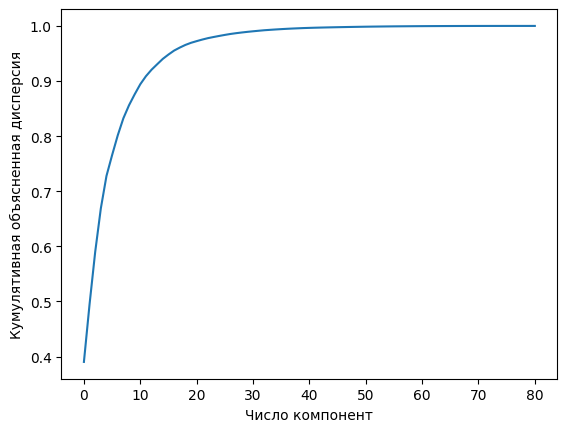

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(X_prepared)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Число компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')

Анализ кумулятивной объясненной дисперсии показывает высокую эффективность PCA для сжатия признакового пространства. Данные демонстрируют отличную сжимаемость:
- **7-8 компонент** объясняют 80% дисперсии (хороший компромисс)
- **10-12 компонент** охватывают 90% дисперсии (оптимальный баланс)
- **20 компонент** приближаются к 100% дисперсии (практически полное сохранение информации)

Сильный рост кривой в начале и быстрое выход на плато свидетельствует о высокой корреляции между исходными признаками. Для дальнейшего тестирования определим оптимальные точки как 5, 7, 10, 12, 15, 20 компонент

In [ ]:
components_to_test = [5, 7, 10, 12, 15, 20, 30, 40, 50, 60, 70, 81]  # взял больше, потому что удивился результату

for n_comp in components_to_test:
    pca = PCA(n_components=n_comp)
    X_pca = pca.fit_transform(X_prepared)

    ridge = Ridge(alpha=6.7, tol=0.1, solver='auto')
    evaluate_model(ridge, X_pca, y_prepared, f"PCA ({n_comp} comp)")

    print(f"Объясненная дисперсия: {np.sum(pca.explained_variance_ratio_):.1%}")

PCA (5 comp)         | MSE: 582.1249 ± 285.8267
Объясненная дисперсия: 72.8%
PCA (7 comp)         | MSE: 547.1915 ± 232.3209
Объясненная дисперсия: 80.1%
PCA (10 comp)        | MSE: 540.9351 ± 235.1745
Объясненная дисперсия: 87.6%
PCA (12 comp)        | MSE: 531.2187 ± 219.5722
Объясненная дисперсия: 90.9%
PCA (15 comp)        | MSE: 513.5165 ± 219.5291
Объясненная дисперсия: 94.0%
PCA (20 comp)        | MSE: 470.4285 ± 206.6528
Объясненная дисперсия: 96.9%
PCA (30 comp)        | MSE: 408.8005 ± 172.4150
Объясненная дисперсия: 98.9%
PCA (40 comp)        | MSE: 403.5896 ± 170.0747
Объясненная дисперсия: 99.6%
PCA (50 comp)        | MSE: 398.4705 ± 158.5065
Объясненная дисперсия: 99.8%
PCA (60 comp)        | MSE: 371.0599 ± 157.3075
Объясненная дисперсия: 100.0%
PCA (70 comp)        | MSE: 355.9036 ± 154.0222
Объясненная дисперсия: 100.0%
PCA (81 comp)        | MSE: 354.5805 ± 151.3563
Объясненная дисперсия: 100.0%


Эксперимент с `PCA` показал, что сокращение размерности ухудшает качество модели. Даже при сохранении 90% дисперсии (12 компонент) `MSE` возрастает на 50% (с $354.6$ до $531.2$). Качество приближается к исходному только при 70+ компонентах. Это свидетельствует о том, что все 81 исходный признак содержит ценную для предсказания информацию, а `Ridge`-регуляризация успешно справляется с мультиколлинеарностью

**Вывод:** `PCA` не требуется для данной задачи

# Финальный вариант и предсказание

После всех проведенных манипуляций можно заключить, что успешными гипотезами являются:
- Использование датасета с агрегированными статистиками
- Стандартизация данных
- Удаление выброса из обучающей выборки
- Аналитическая реализация
- `Ridge`-регуляризатор
- Солвер без итераций
- Коэффициент `L2`-регуляризации $6.706$
- Допуск сходимости $0.1$

Улучшение относительно baseline:
- **Baseline (mean)**: `MSE` = $1454.2$
- **Лучшая модель**: `MSE` = $354.6$

Улучшение в $4.1$ раза (снижение ошибки на $75.6$%)

Теперь применим полученные знания к тестовым данным, запишем в `csv`-файл и отправим на проверку!

In [ ]:
# создадим лучшую модель и обучим на всех тренировочных данных
best_model = Ridge(alpha=6.7, tol=0.1, solver='auto')
best_model.fit(X_prepared, y_prepared)

Ridge(alpha=6.7, tol=0.1)

In [ ]:
# подготовим данные
X_test = pd.read_csv('test.csv')

In [ ]:
# проверим, что признаков столько же
len(X_test.columns.values)

81

In [ ]:
# стандартизация
X_test_scaled = scaler_std.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [ ]:
# предсказания
y_pred = best_model.predict(X_test_scaled)

In [ ]:
# cохраняем в CSV
submission = pd.DataFrame({
    'index': range(len(y_pred)),
    'critical_temp': y_pred
})

submission.to_csv('submission.csv', index=False)

На этом исследование завершено. Получаем такой результат на Kaggle:

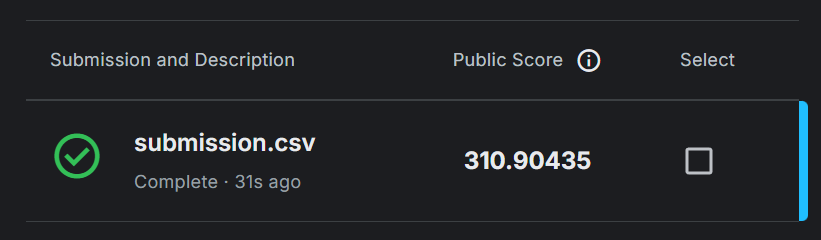